## Set samples to be FH deficient or not

    1) Use IQR to separate samples into FH deficient or FH normal 
    2) Do FH deficient (< 1.5 IQR) vs normal (normal IQR) vs FH high (> 1.5 IQR)
    

In [1]:
import pandas as pd

rna_df = pd.read_csv('data/rna_df.csv')
rna_df

,Unnamed: 0,id,TCGA-KIRC_PrimaryTumor_male_white_4_htseq.counts_None_43_TCGA-KIRC_TCGA-B0-5115_22245d1e-8376-46e1-8d3c-b5c3961c772e,TCGA-KIRC_PrimaryTumor_male_white_1_htseq.counts_None_40_TCGA-KIRC_TCGA-BP-4968_39b55de6-d4be-451b-9e7d-31da539e67fb,TCGA-KIRC_PrimaryTumor_female_white_1_htseq.counts_1625_53_TCGA-KIRC_TCGA-BP-4326_42c14f01-2589-428e-b3ee-0ac4cbb2cbe6,TCGA-KIRC_PrimaryTumor_female_white_1_htseq.counts_None_41_TCGA-KIRC_TCGA-B8-4146_837705e7-ac01-496c-bf82-4ce52b1b03d0,TCGA-KIRP_PrimaryTumor_male_white_4_htseq.counts_329_63_TCGA-KIRP_TCGA-BQ-5889_81ab86c9-90d8-45e8-a5ea-ee7266d7fbdc,TCGA-KIRP_PrimaryTumor_male_white_1_htseq.counts_None_67_TCGA-KIRP_TCGA-A4-7997_35945ed1-5f34-4ec0-85a0-a9140e46fc02,TCGA-KIRP_PrimaryTumor_female_white_1_htseq.counts_None_45_TCGA-KIRP_TCGA-A4-A5DU_657bc0f0-6d5e-41a0-8ba3-277612a22855,TCGA-KICH_PrimaryTumor_female_white_2_htseq.counts_725_56_TCGA-KICH_TCGA-KL-8325_cc9b0456-0d33-4b8f-83ae-5931fe227c68,...,TCGA-KIRP_PrimaryTumor_female_white_1_htseq.counts_None_77_TCGA-KIRP_TCGA-B1-A655_f115452a-b394-4605-bd05-9fef0f55a697,TCGA-KIRP_PrimaryTumor_male_blackorafricanamerican_1_htseq.counts_None_43_TCGA-KIRP_TCGA-DW-7963_6e73166a-9dc8-4fc2-95d0-4a8b921ce3d9,TCGA-KIRC_PrimaryTumor_female_white_1_htseq.counts_None_41_TCGA-KIRC_TCGA-B8-5552_50b48a7e-8dba-4316-94b2-42f0b1b16e1e,TCGA-KIRC_SolidTissueNormal_female_white_4_htseq.counts_782_54_TCGA-KIRC_TCGA-CJ-5677_96124930-9504-4947-b81f-5ff241691f6f,TCGA-KIRP_PrimaryTumor_female_blackorafricanamerican_2_htseq.counts_None_62_TCGA-KIRP_TCGA-UZ-A9PS_56ff20e1-0655-497f-b1da-0ca6f914b901,TCGA-KICH_PrimaryTumor_female_white_1_htseq.counts_None_44_TCGA-KICH_TCGA-KO-8415_5950dbf0-452d-466c-9bf6-c10177cb16ac,TCGA-KIRC_PrimaryTumor_male_notreported_1_htseq.counts_None_54_TCGA-KIRC_TCGA-A3-3380_81791559-9f71-4f97-97b0-fef5e92278fd,TCGA-KIRC_PrimaryTumor_female_white_4_htseq.counts_709_66_TCGA-KIRC_TCGA-B8-4143_6369de09-0480-4c50-9e46-beeb10de1473,TCGA-KICH_PrimaryTumor_male_white_2_htseq.counts_None_69_TCGA-KICH_TCGA-KO-8409_85831cff-c743-4622-aa6b-fb92f48be1cb,TCGA-KIRC_PrimaryTumor_female_blackorafricanamerican_1_htseq.counts_None_60_TCGA-KIRC_TCGA-B8-A8YJ_b6488311-0f50-4c39-a896-fe14f78186ab
0,0,ENSG00000000003.13,2429,3944,2177,5925,2638,4406,2103,5145,...,4062,1153,2616,4395,5355,1177,3839,1233,1675,1502
1,1,ENSG00000000005.5,28,56,6,39,224,13,16,129,...,0,0,33,33,1,4,31,1,9,8
2,2,ENSG00000000419.11,1608,1942,1244,3233,1240,3022,896,2033,...,1681,382,1590,1459,1635,1317,1964,1293,940,1196
3,3,ENSG00000000457.12,1203,775,589,1139,607,911,472,716,...,613,125,963,993,458,331,830,832,242,491
4,4,ENSG00000000460.15,432,177,197,396,174,394,138,213,...,181,45,255,120,196,76,201,394,38,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,60483,__no_feature,8686610,7248890,7314898,4571322,3740595,5301161,4845466,4152619,...,2750292,1423176,3524200,3793607,4841128,3077352,7446537,7183037,4901316,3472269
60484,60484,__ambiguous,2589533,3415795,2832655,1763607,2738339,2870943,1553514,2297068,...,2503790,664667,2816056,2189212,2485003,2417642,2886022,2469387,1912741,2151611
60485,60485,__too_low_aQual,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60486,60486,__not_aligned,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import pandas as pd

kirc = rna_df[['id'] + [c for c in rna_df.columns if 'KIRC' in c]]
kirp = rna_df[['id'] + [c for c in rna_df.columns if 'KIRP' in c]]

In [3]:
# Assign gene name based on ensembl ID
gene_info = pd.read_csv('data/hsapiens_gene_ensembl-GRCh38.p13.csv')
ens_to_gene = dict(zip(gene_info.ensembl_gene_id, gene_info.external_gene_name))
ens_to_gene['ENSG00000000005'] # As an example

'TNMD'

In [4]:
gene_names = []
for g in kirc.id.values:
    gene_names.append(ens_to_gene.get(g.split('.')[0]))
kirc['external_gene_name'] = gene_names
kirc.dropna(inplace=True)

gene_names = []
for g in kirp.id.values:
    gene_names.append(ens_to_gene.get(g.split('.')[0]))
kirp['external_gene_name'] = gene_names
kirp.dropna(inplace=True)

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

## Calculate IQR of Fumerate Hydratase

In [5]:
from scipy.stats import iqr

kirc_tumour = kirc[['id', 'external_gene_name'] + [c for c in kirc.columns if 'Tumor' in c]]
kirc_fh = kirc_tumour[kirc_tumour['external_gene_name'] == 'FH'][[c for c in kirc_tumour if 'TCGA' in c]].values[0]

kirp_tumour = kirp[['id', 'external_gene_name'] + [c for c in kirp.columns if 'Tumor' in c]]
kirp_fh = kirp_tumour[kirp_tumour['external_gene_name'] == 'FH'][[c for c in kirp_tumour if 'TCGA' in c]].values[0]


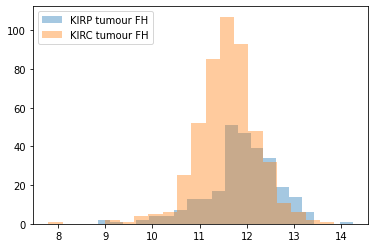

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.log2(kirp_fh + 1), alpha=0.4, bins=20, label='KIRP tumour FH')
plt.hist(np.log2(kirc_fh + 1), alpha=0.4, bins=20, label='KIRC tumour FH')
plt.legend()

In [7]:
# Want to do mean += IQR for labelling 
kirp_values = np.log2(kirp_fh + 1)
kirc_values = np.log2(kirc_fh + 1)

# Pretty similar IQRs so we'll do it based on the results within each dataset
print('KIRP:', iqr(kirp_values), np.median(kirp_values), np.percentile(kirp_values, 75) + 1.5*iqr(kirp_values), np.percentile(kirp_values, 25) - 1.5*iqr(kirp_values))
print('KIRC:', iqr(kirc_values), np.median(kirc_values), np.percentile(kirp_values, 75)+ 1.5*iqr(kirc_values), np.percentile(kirp_values, 25) - 1.5*iqr(kirc_values))

KIRP: 0.8660848362853777 11.945992134782106 13.722436380606153 10.258097035464642
KIRC: 0.7704113026161856 11.595257481449035 13.578926080102365 10.40160733596843


In [8]:
print(np.percentile(kirp_values, 25))
print(np.percentile(kirp_values, 75))

11.557224289892709
12.423309126178086


## Classify low FH as outliers 


In [9]:
label = 'outlier'
iqr_cutoff = 1.5

kirp_fh_low = np.percentile(kirp_values, 25) - iqr_cutoff*iqr(kirp_values) 
kirp_fh_high = np.percentile(kirp_values, 75)
# And between would be normal

sample_df = pd.DataFrame()
column_labels = []
fh_annot = []
fh_value = []
sex = []
for i, v in enumerate(kirp_tumour[[c for c in kirp_tumour if 'TCGA' in c]].columns):
    if kirp_values[i] < kirp_fh_low:
        fh_annot.append(f'FH {label}')
        fh_value.append(1)
    elif kirp_values[i] > kirp_fh_high:
        fh_annot.append('FH high')
        fh_value.append(0)
    elif kirp_values[i] > np.percentile(kirp_values, 25):
        fh_annot.append('FH normal')
        fh_value.append(0)
    else:
        fh_annot.append(None)
        fh_value.append(None)
    column_labels.append(v)
    sex.append(v.split('_')[2])
sample_df['FH_status'] = fh_annot
sample_df['Label'] = column_labels
sample_df['Sex'] = sex
sample_df['condition'] = fh_value

sample_df.FH_status.value_counts()

FH normal     136
FH high        69
FH outlier      9
Name: FH_status, dtype: int64

In [10]:
# Save to dataframe
sample_df.to_csv(f'data/kirp_sample_df.csv', index=False)
kirp_tumour.to_csv(f'data/kirp_tumour_df.csv', index=False)

low_high_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH high'])]
low_high_samples.to_csv(f'data/kirp_high_{label}_sample_df.csv', index=False)

kirp_tumour[['id', 'external_gene_name'] + list(low_high_samples['Label'].values)].to_csv(f'data/kirp_tumour_high_{label}_df.csv', index=False)

low_normal_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH normal'])]
low_normal_samples.to_csv(f'data/kirp_normal_{label}_sample_df.csv', index=False)

kirp_tumour[['id', 'external_gene_name'] + list(low_normal_samples['Label'].values)].to_csv(f'data/kirp_tumour_normal_{label}_df.csv', index=False)

## Plot results for FH low vs high and normal for FOXA2

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH outlier v.s. FH high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.135e-02 U_stat=1.500e+02


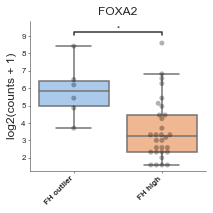

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH outlier v.s. FH normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.328e-03 U_stat=3.095e+02


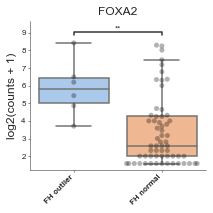

In [11]:
# Get the top and bottom 15 patients tumour samples
import seaborn as sns
import numpy as np
from sciviso import *

gene_name = 'FOXA2'
fh_status = dict(zip(sample_df.Label, sample_df.FH_status))
gene_df = kirp_tumour[kirp_tumour['external_gene_name'] == gene_name]

values = []
labels = []
states = []
for c in gene_df.columns:
    if 'TCGA' in c and gene_df[c].values[0] > 1:
        labels.append(fh_status.get(c))
        values.append(gene_df[c].values[0])
        states.append(c.split('_')[2])
        
box_df = pd.DataFrame()
box_df['RNA'] = np.log2(np.array(values) + 1)
box_df['label'] = labels
box_df['cond'] = states
config = {'figsize': (3, 3)}

# Look at FH high vs FH low
df = box_df[box_df['label'].isin([f'FH {label}', 'FH high'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH high'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHhigh.svg')
plt.show()

# Also do FH low vs FH normal
df = box_df[box_df['label'].isin([f'FH {label}', 'FH normal'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH normal'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHnormal.svg')
plt.show()


## Perform DE with DEseq2 and check if FOXA2 is sig diff

In [12]:
de_results = pd.read_csv(f'data/DEseq2_kirp_high_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

de_results = pd.read_csv(f'data/DEseq2_kirp_normal_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

     Unnamed: 0   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
6068      FOXA2  19.984348        2.679847  1.112666  2.408493  0.016019   

          padj  
6068  0.067318  
     Unnamed: 0   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
7371      FOXA2  16.935439        2.277532  1.143893  1.991036  0.046477   

          padj  
7371  0.169151  


## Classify low FH as bottom quartile


In [13]:
iqr_cutoff = 0
label = 'low'
kirp_fh_low = np.percentile(kirp_values, 25) - iqr_cutoff*iqr(kirp_values) 
kirp_fh_high = np.percentile(kirp_values, 75)
# And between would be normal

sample_df = pd.DataFrame()
column_labels = []
fh_annot = []
fh_value = []
sex = []
for i, v in enumerate(kirp_tumour[[c for c in kirp_tumour if 'TCGA' in c]].columns):
    if kirp_values[i] < kirp_fh_low:
        fh_annot.append(f'FH {label}')
        fh_value.append(1)
    elif kirp_values[i] > kirp_fh_high:
        fh_annot.append('FH high')
        fh_value.append(0)
    elif kirp_values[i] > np.percentile(kirp_values, 25):
        fh_annot.append('FH normal')
        fh_value.append(0)
    else:
        fh_annot.append(None)
        fh_value.append(None)
    column_labels.append(v)
    sex.append(v.split('_')[2])
sample_df['FH_status'] = fh_annot
sample_df['Label'] = column_labels
sample_df['Sex'] = sex
sample_df['condition'] = fh_value

sample_df.FH_status.value_counts()

FH normal    136
FH low        69
FH high       69
Name: FH_status, dtype: int64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH low v.s. FH high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.623e-01 U_stat=6.105e+02


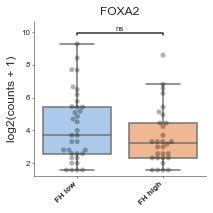

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH low v.s. FH normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.401e-02 U_stat=1.363e+03


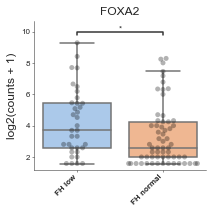

In [14]:
# Save to dataframe

low_high_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH high'])]
low_high_samples.to_csv(f'data/kirp_high_{label}_sample_df.csv', index=False)

kirp_tumour[['id', 'external_gene_name'] + list(low_high_samples['Label'].values)].to_csv(f'data/kirp_tumour_high_{label}_df.csv', index=False)

low_normal_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH normal'])]
low_normal_samples.to_csv(f'data/kirp_normal_{label}_sample_df.csv', index=False)

kirp_tumour[['id', 'external_gene_name'] + list(low_normal_samples['Label'].values)].to_csv(f'data/kirp_tumour_normal_{label}_df.csv', index=False)


# Perform plots
gene_name = 'FOXA2'
fh_status = dict(zip(sample_df.Label, sample_df.FH_status))
gene_df = kirp_tumour[kirp_tumour['external_gene_name'] == gene_name]

values = []
labels = []
states = []
for c in gene_df.columns:
    if 'TCGA' in c and gene_df[c].values[0] > 1:
        labels.append(fh_status.get(c))
        values.append(gene_df[c].values[0])
        states.append(c.split('_')[2])
        
box_df = pd.DataFrame()
box_df['RNA'] = np.log2(np.array(values) + 1)
box_df['label'] = labels
box_df['cond'] = states
config = {'figsize': (3, 3)}

# Look at FH high vs FH low
df = box_df[box_df['label'].isin([f'FH {label}', 'FH high'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH high'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHhigh.svg')
plt.show()

# Also do FH low vs FH normal
df = box_df[box_df['label'].isin([f'FH {label}', 'FH normal'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH normal'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHnormal.svg')
plt.show()


## Perform DE with quartile data

In [15]:
de_results = pd.read_csv(f'data/DEseq2_kirp_high_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

de_results = pd.read_csv(f'data/DEseq2_kirp_normal_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

     Unnamed: 0   baseMean  log2FoldChange    lfcSE      stat    pvalue  \
5667      FOXA2  18.163614        2.358708  0.53003  4.450143  0.000009   

          padj  
5667  0.000041  
     Unnamed: 0  baseMean  log2FoldChange     lfcSE      stat   pvalue  \
9356      FOXA2  18.04241         1.17605  0.496625  2.368084  0.01788   

          padj  
9356  0.053735  


# Do the same with KIRC

FH normal     240
FH high       120
FH outlier      9
Name: FH_status, dtype: int64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH outlier v.s. FH high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.922e-01 U_stat=1.910e+02


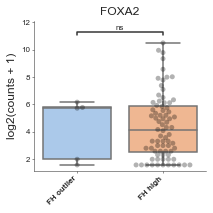

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH outlier v.s. FH normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.422e-01 U_stat=4.355e+02


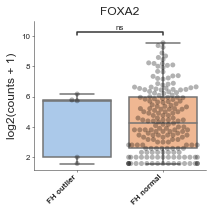

In [16]:
iqr_cutoff = 1.5
label = 'outlier'
kirc_fh_low = np.percentile(kirc_values, 25) - iqr_cutoff*iqr(kirc_values) 
kirc_fh_high = np.percentile(kirc_values, 75)
# And between would be normal

sample_df = pd.DataFrame()
column_labels = []
fh_annot = []
fh_value = []
sex = []
for i, v in enumerate(kirc_tumour[[c for c in kirc_tumour if 'TCGA' in c]].columns):
    if kirc_values[i] < kirc_fh_low:
        fh_annot.append(f'FH {label}')
        fh_value.append(1)
    elif kirc_values[i] > kirc_fh_high:
        fh_annot.append('FH high')
        fh_value.append(0)
    elif kirc_values[i] > np.percentile(kirc_values, 25):
        fh_annot.append('FH normal')
        fh_value.append(0)
    else:
        fh_annot.append(None)
        fh_value.append(None)
    column_labels.append(v)
    sex.append(v.split('_')[2])
sample_df['FH_status'] = fh_annot
sample_df['Label'] = column_labels
sample_df['Sex'] = sex
sample_df['condition'] = fh_value

print(sample_df.FH_status.value_counts())

# save 
# Save to dataframe

low_high_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH high'])]
low_high_samples.to_csv(f'data/kirc_high_{label}_sample_df.csv', index=False)

kirc_tumour[['id', 'external_gene_name'] + list(low_high_samples['Label'].values)].to_csv(f'data/kirc_tumour_high_{label}_df.csv', index=False)

low_normal_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH normal'])]
low_normal_samples.to_csv(f'data/kirc_normal_{label}_sample_df.csv', index=False)

kirc_tumour[['id', 'external_gene_name'] + list(low_normal_samples['Label'].values)].to_csv(f'data/kirc_tumour_normal_{label}_df.csv', index=False)


# Perform plots
gene_name = 'FOXA2'
fh_status = dict(zip(sample_df.Label, sample_df.FH_status))
gene_df = kirc_tumour[kirc_tumour['external_gene_name'] == gene_name]

values = []
labels = []
states = []
for c in gene_df.columns:
    if 'TCGA' in c and gene_df[c].values[0] > 1:
        labels.append(fh_status.get(c))
        values.append(gene_df[c].values[0])
        states.append(c.split('_')[2])
        
box_df = pd.DataFrame()
box_df['RNA'] = np.log2(np.array(values) + 1)
box_df['label'] = labels
box_df['cond'] = states
config = {'figsize': (3, 3)}

# Look at FH high vs FH low
df = box_df[box_df['label'].isin([f'FH {label}', 'FH high'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH high'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHhigh_kirc.svg')
plt.show()

# Also do FH low vs FH normal
df = box_df[box_df['label'].isin([f'FH {label}', 'FH normal'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH normal'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHnormal_kirc.svg')
plt.show()


In [17]:
label = 'outlier'
de_results = pd.read_csv(f'data/DEseq2_kirc_high_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

de_results = pd.read_csv(f'data/DEseq2_kirc_normal_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

      Unnamed: 0   baseMean  log2FoldChange    lfcSE      stat    pvalue  \
19639      FOXA2  49.318647        1.291465  1.05464  1.224554  0.220743   

           padj  
19639  0.322325  
      Unnamed: 0   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
20213      FOXA2  50.560696        1.093147  0.868888  1.258099  0.208356   

           padj  
20213  0.312884  


## Low KIRC

FH normal    240
FH low       120
FH high      120
Name: FH_status, dtype: int64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH low v.s. FH high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.160e-01 U_stat=3.260e+03


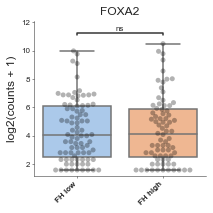

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH low v.s. FH normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.052e-01 U_stat=7.582e+03


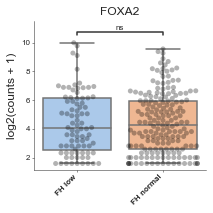

In [18]:
iqr_cutoff = 0
label = 'low'
kirc_fh_low = np.percentile(kirc_values, 25) - iqr_cutoff*iqr(kirc_values) 
kirc_fh_high = np.percentile(kirc_values, 75)
# And between would be normal

sample_df = pd.DataFrame()
column_labels = []
fh_annot = []
fh_value = []
sex = []
for i, v in enumerate(kirc_tumour[[c for c in kirc_tumour if 'TCGA' in c]].columns):
    if kirc_values[i] < kirc_fh_low:
        fh_annot.append(f'FH {label}')
        fh_value.append(1)
    elif kirc_values[i] > kirc_fh_high:
        fh_annot.append('FH high')
        fh_value.append(0)
    elif kirc_values[i] > np.percentile(kirc_values, 25):
        fh_annot.append('FH normal')
        fh_value.append(0)
    else:
        fh_annot.append(None)
        fh_value.append(None)
    column_labels.append(v)
    sex.append(v.split('_')[2])
sample_df['FH_status'] = fh_annot
sample_df['Label'] = column_labels
sample_df['Sex'] = sex
sample_df['condition'] = fh_value

print(sample_df.FH_status.value_counts())

# save 
# Save to dataframe

low_high_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH high'])]
low_high_samples.to_csv(f'data/kirc_high_{label}_sample_df.csv', index=False)

kirc_tumour[['id', 'external_gene_name'] + list(low_high_samples['Label'].values)].to_csv(f'data/kirc_tumour_high_{label}_df.csv', index=False)

low_normal_samples = sample_df[sample_df.FH_status.isin([f'FH {label}', 'FH normal'])]
low_normal_samples.to_csv(f'data/kirc_normal_{label}_sample_df.csv', index=False)

kirc_tumour[['id', 'external_gene_name'] + list(low_normal_samples['Label'].values)].to_csv(f'data/kirc_tumour_normal_{label}_df.csv', index=False)


# Perform plots
gene_name = 'FOXA2'
fh_status = dict(zip(sample_df.Label, sample_df.FH_status))
gene_df = kirc_tumour[kirc_tumour['external_gene_name'] == gene_name]

values = []
labels = []
states = []
for c in gene_df.columns:
    if 'TCGA' in c and gene_df[c].values[0] > 1:
        labels.append(fh_status.get(c))
        values.append(gene_df[c].values[0])
        states.append(c.split('_')[2])
        
box_df = pd.DataFrame()
box_df['RNA'] = np.log2(np.array(values) + 1)
box_df['label'] = labels
box_df['cond'] = states
config = {'figsize': (3, 3)}

# Look at FH high vs FH low
df = box_df[box_df['label'].isin([f'FH {label}', 'FH high'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH high'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHhigh_kirc.svg')
plt.show()

# Also do FH low vs FH normal
df = box_df[box_df['label'].isin([f'FH {label}', 'FH normal'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH normal'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHnormal_kirc.svg')
plt.show()


/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH low v.s. FH high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.141e-41 U_stat=0.000e+00


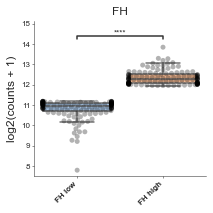

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FH low v.s. FH normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.535e-54 U_stat=0.000e+00


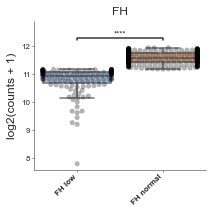

In [20]:

# Perform plots
gene_name = 'FH'
fh_status = dict(zip(sample_df.Label, sample_df.FH_status))
gene_df = kirc_tumour[kirc_tumour['external_gene_name'] == gene_name]

values = []
labels = []
states = []
for c in gene_df.columns:
    if 'TCGA' in c and gene_df[c].values[0] > 1:
        labels.append(fh_status.get(c))
        values.append(gene_df[c].values[0])
        states.append(c.split('_')[2])
        
box_df = pd.DataFrame()
box_df['RNA'] = np.log2(np.array(values) + 1)
box_df['label'] = labels
box_df['cond'] = states
config = {'figsize': (3, 3)}

# Look at FH high vs FH low
df = box_df[box_df['label'].isin([f'FH {label}', 'FH high'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH high'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHhigh_kirc.svg')
plt.show()

# Also do FH low vs FH normal
df = box_df[box_df['label'].isin([f'FH {label}', 'FH normal'])]
bp = Boxplot(df=df, x='label', y='RNA', ylabel='log2(counts + 1)', title=gene_name, add_stats=True, 
             add_dots=True, config=config, order=[f'FH {label}', 'FH normal'])
bp.plot(legend=False)
plt.savefig(f'fig/{gene_name}_FH{label}-FHnormal_kirc.svg')
plt.show()


In [19]:
label = 'low'
de_results = pd.read_csv(f'data/DEseq2_kirc_high_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

de_results = pd.read_csv(f'data/DEseq2_kirc_normal_{label}.csv')
print(de_results[de_results['Unnamed: 0'] == gene_name])

      Unnamed: 0  baseMean  log2FoldChange     lfcSE      stat  pvalue  \
23382      FOXA2  48.47172        0.601737  0.377463  1.594161  0.1109   

           padj  
23382  0.147372  
      Unnamed: 0   baseMean  log2FoldChange     lfcSE     stat    pvalue  \
23363      FOXA2  49.474769        0.390083  0.293179  1.33053  0.183344   

           padj  
23363  0.252156  
